In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv("./../../Dataset/cleaned_data.csv", index_col=0)

In [3]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
289193,08/02/2019,9:45,MANHATTAN,40.762604,-73.978470,0.0,0.0,0,0,0,0,0,0
487892,09/19/2018,17:20,BROOKLYN,40.636024,-73.895060,0.0,0.0,0,0,0,0,0,0
1421033,07/05/2014,6:30,QUEENS,40.745410,-73.889257,0.0,0.0,0,0,0,0,0,0
1477640,04/07/2014,18:00,QUEENS,40.764350,-73.825943,1.0,0.0,1,0,0,0,0,0
1169435,09/13/2015,0:30,QUEENS,40.709830,-73.776338,0.0,0.0,0,0,0,0,0,0


## Information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34780 entries, 289193 to 1525735
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     34780 non-null  object 
 1   CRASH TIME                     34780 non-null  object 
 2   BOROUGH                        34780 non-null  object 
 3   LATITUDE                       34780 non-null  float64
 4   LONGITUDE                      34780 non-null  float64
 5   NUMBER OF PERSONS INJURED      34780 non-null  float64
 6   NUMBER OF PERSONS KILLED       34780 non-null  float64
 7   NUMBER OF PEDESTRIANS INJURED  34780 non-null  int64  
 8   NUMBER OF PEDESTRIANS KILLED   34780 non-null  int64  
 9   NUMBER OF CYCLIST INJURED      34780 non-null  int64  
 10  NUMBER OF CYCLIST KILLED       34780 non-null  int64  
 11  NUMBER OF MOTORIST INJURED     34780 non-null  int64  
 12  NUMBER OF MOTORIST KILLED      34780 no

In [5]:
df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,34780.000000,34780.000000,34780.000000,34780.000000,34780.00000,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000
mean,40.674016,-73.834497,0.263571,0.000978,0.06176,0.000546,0.026912,0.000115,0.173634,0.000316
std,1.382378,2.506796,0.643078,0.033040,0.25227,0.024567,0.163947,0.010724,0.593834,0.019331
min,0.000000,-74.253930,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.668103,-73.975890,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.716299,-73.928214,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.764623,-73.864814,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40.912080,0.000000,18.000000,2.000000,4.00000,2.000000,2.000000,1.000000,18.000000,2.000000


In [6]:
df.shape

(34780, 13)

In [7]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'LATITUDE', 'LONGITUDE',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'],
      dtype='object')

In [8]:
df.isnull().sum()

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
LATITUDE                         0
LONGITUDE                        0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
dtype: int64

## Splitting the dataset

In [9]:
#Adding a new column for years
df["CRASH DATE"] = pd.to_datetime(df["CRASH DATE"])
df["year"] = df["CRASH DATE"].dt.year
df["year"].unique()

array([2019, 2018, 2014, 2015, 2013, 2017, 2016, 2012, 2020, 2021],
      dtype=int64)

In [10]:
#Adding a month column for months
df["month"] = df["CRASH DATE"].dt.month
df["month"].unique()

array([ 8,  9,  7,  4,  1,  5,  2, 12, 10,  6, 11,  3], dtype=int64)

In [11]:
# Setting our training and target variables
X = df.drop(["CRASH DATE", "CRASH TIME", "BOROUGH", "year", "month"], axis=1)
y = df["BOROUGH"]

In [12]:
#Splitting our dataset for training (80%) and testing (20%). Using a random state to keep values constant.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Logistic Regression

In [13]:
#Model instantiation
logreg = LogisticRegression()

In [14]:
#Model fitting
logreg.fit(X_train, y_train)

LogisticRegression()

In [30]:
#Making a class predictions for the training set
y_pred_train = logreg.predict(X_train)
print(accuracy_score(y_train, y_pred_train))

0.5578996549741231


In [31]:
#Making a class predictions for the testing set
y_pred_test = logreg.predict(X_test)

#Checking our model accuracy
print(accuracy_score(y_test, y_pred_test))

0.5605232892466935


#### What does the score measure?
- The score of our Logistic Regression Model is 0.56 (56%). It means that the model will predict the right borough 56% of the time.

## Neural Network

In [32]:
# Using sklearn to to train a Neural Network (MLP Classifier) on the training set
nn = MLPClassifier(hidden_layer_sizes=(12, 6), max_iter=10)
nn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(12, 6), max_iter=10)

In [35]:
#Making a class predictions for the training set
y_pred_train = nn.predict(X_train)
print(accuracy_score(y_train, y_pred_train))

0.31717222541690626


In [36]:
#Making a class predictions for the testing set
y_pred_test = nn.predict(X_test)

#Checking our model accuracy
print(accuracy_score(y_test, y_pred_test))

0.3257619321449109


#### What does the score measure?
- The score of our Neural Network Model is 0.32 (32%). It means that the model will predict the right borough 32% of the time.

## K-Nearest Neighbors

In [38]:
# Using sklearn to 'train' a k-Neighbors Classifier
# Note: KNN is a nonparametric model and technically doesn't require training
# fit will essentially load the data into the model see link below for more information
# https://stats.stackexchange.com/questions/349842/why-do-we-need-to-fit-a-k-nearest-neighbors-classifier
k_neighbors = KNeighborsClassifier(n_neighbors=5)
k_neighbors.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
#Making a class predictions for the training set
y_pred_train = k_neighbors.predict(X_train)
print(accuracy_score(y_train, y_pred_train))

0.9777530189764232


In [41]:
#Making a class predictions for the testing set
y_pred_test = k_neighbors.predict(X_test)

#Checking our model accuracy
print(accuracy_score(y_test, y_pred_test))

0.9751293847038528


#### What does the score measure?
- The score of our K-Nearest Neighbors model (with n_neighbors = 5) is 0.97 (97%). It means that the model will predict the right borough 97% of the time.

### Confusion Matrix

In [19]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[ 132    0   71  767    5]
 [   0 2060   94   83   29]
 [   1  487  147  968    6]
 [   0  112  125 1560   19]
 [   0  279    1   10    0]]


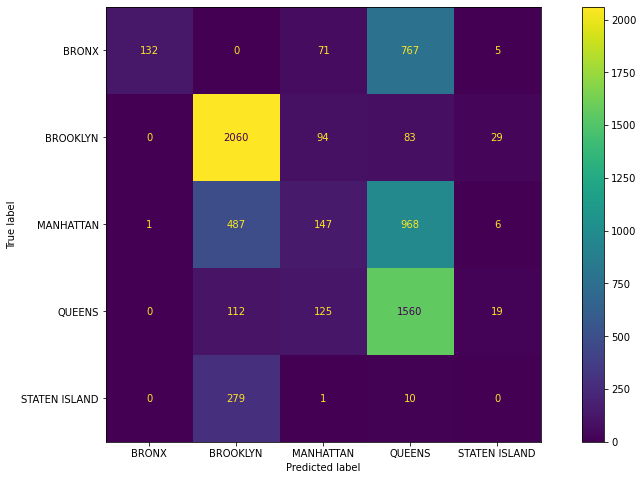

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(logreg, X_test, y_test, ax=ax)
plt.grid(False)

### Classification Report of our Model

In [21]:
#Classification report of our model
print(classification_report(y_test, pred))

               precision    recall  f1-score   support

        BRONX       0.99      0.14      0.24       975
     BROOKLYN       0.70      0.91      0.79      2266
    MANHATTAN       0.34      0.09      0.14      1609
       QUEENS       0.46      0.86      0.60      1816
STATEN ISLAND       0.00      0.00      0.00       290

     accuracy                           0.56      6956
    macro avg       0.50      0.40      0.35      6956
 weighted avg       0.57      0.56      0.48      6956

